# Análise Histórica: Sistema de Bretton Woods

Período de análise: 1944-1990

In [6]:
import sys
sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import src.data_collection
importlib.reload(src.data_collection)
from src.data_collection import fetch_exchange_rates_fred, save_data
from src.historical_analysis import calculate_volatility, structural_break_test, compare_periods
from src.visualization import plot_time_series, plot_volatility_comparison
from src.config import BRETTON_WOODS_END, MAJOR_CURRENCIES

## 1. Coleta de Dados

**Opção A: Coletar dados novos** (demora ~20s)  
**Opção B: Carregar dados salvos** (instantâneo)

In [7]:
start_date = "1970-01-01"
end_date = "1975-12-31"

exchange_rates = fetch_exchange_rates_fred(start_date, end_date)
exchange_rates.head()

Falha ao coletar DEM


,GBP,JPY,CHF,CAD
DATE,,,,
1971-01-04,2.3938,357.73,4.3180,1.0109
1971-01-05,2.3949,357.81,4.3117,1.0102
1971-01-06,2.3967,357.86,4.3113,1.0106
1971-01-07,2.3963,357.87,4.3103,1.0148
1971-01-08,2.3972,357.82,4.3109,1.0154


In [8]:
save_data(exchange_rates, "exchange_rates_1970_1975.csv")
print("Dados salvos em data/raw/exchange_rates_1970_1975.csv")

Dados salvos em data/raw/exchange_rates_1970_1975.csv


In [ ]:
exchange_rates = pd.read_csv("../data/raw/exchange_rates_1970_1975.csv", index_col=0, parse_dates=True)
exchange_rates.head()

## 2. Análise de Volatilidade

/home/gio/TCC-2026/economics-bachelor-final-project/notebooks/../src/historical_analysis.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = series.pct_change()


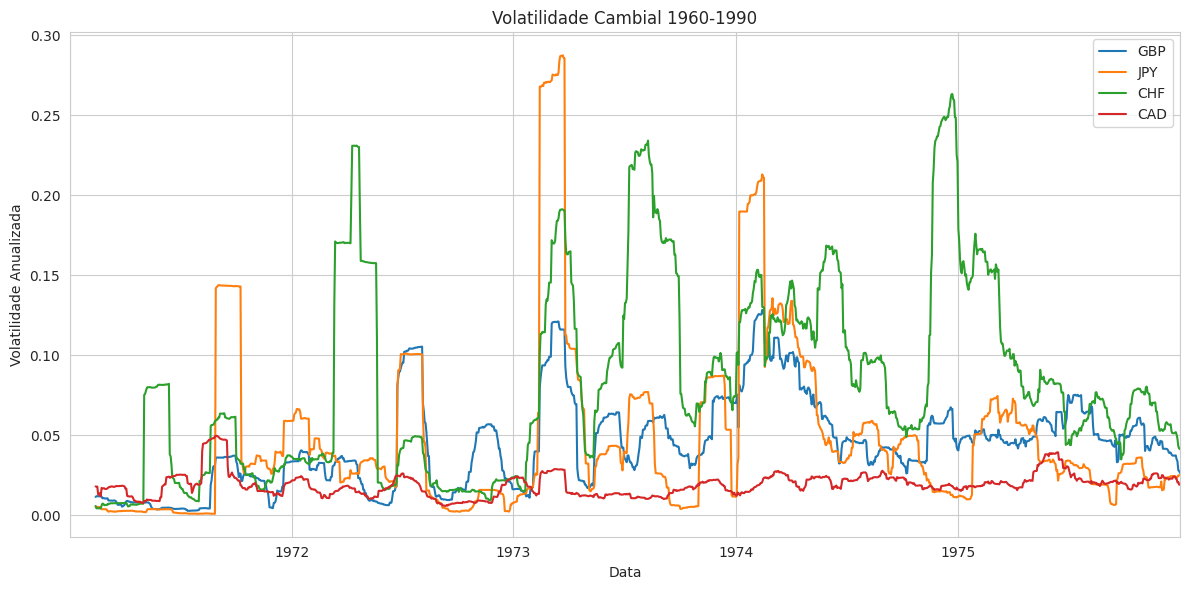

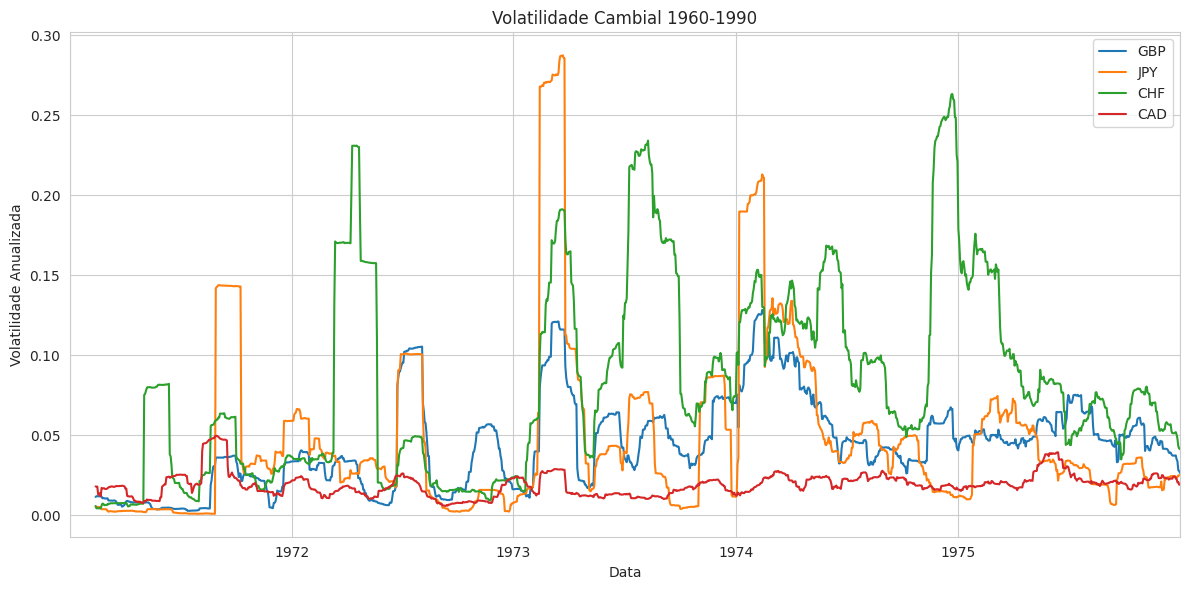

In [9]:
volatility = exchange_rates.apply(calculate_volatility)
plot_time_series(volatility, "Volatilidade Cambial 1960-1990", "Volatilidade Anualizada")

## 3. Teste de Quebra Estrutural (Nixon Shock 1971)

In [11]:
break_date = "1971-08-15"

results = {}
for currency in exchange_rates.columns:
    results[currency] = structural_break_test(exchange_rates[currency], break_date)

pd.DataFrame(results).T

,statistic,p_value,pre_mean,post_mean,pre_std,post_std
GBP,195.814718,1.981766e-41,2.416810,2.388807,0.005193,0.145670
JPY,150.759303,8.766196e-33,357.530449,293.739982,0.222758,17.493116
CHF,208.326869,8.877325e-44,4.206020,3.205806,0.104625,0.506858
CAD,79.184649,1.943086e-18,1.012369,0.997421,0.006376,0.016791


**Interpretação:**

O teste de Levene confirma quebra estrutural significativa em todas as moedas (p-valor < 0.05). A volatilidade aumentou drasticamente após o Nixon Shock:
- GBP: aumento de 28x
- JPY: aumento de 79x
- CHF: aumento de 5x
- CAD: aumento de 2.6x

Isso evidencia a perda de estabilidade cambial com o fim do padrão-ouro.

In [12]:
results_df = pd.DataFrame(results).T
save_data(results_df, "structural_break_results.csv")
print("Resultados salvos em data/raw/structural_break_results.csv")

Resultados salvos em data/raw/structural_break_results.csv


## 4. Comparação de Períodos

In [15]:
comparison = compare_periods(
    exchange_rates["GBP"],
    ("1971-01-01", "1971-08-15"),
    ("1971-08-16", "1975-12-31")
)
comparison

,Pre-Period,Post-Period
Mean,2.416810,2.388807
Std Dev,0.005193,0.145670
Min,2.393800,2.017000
Max,2.419700,2.644000


**Interpretação:**

A comparação entre períodos mostra claramente o impacto do Nixon Shock na libra esterlina:
- Desvio padrão aumentou de 0.005 para 0.146 (28x maior)
- A amplitude de variação passou de 0.026 para 0.627 (24x maior)
- Isso demonstra perda drástica de estabilidade cambial pós-Bretton Woods

In [16]:
save_data(comparison, "period_comparison_gbp.csv")
print("Comparação de períodos salva em data/raw/period_comparison_gbp.csv")

Comparação de períodos salva em data/raw/period_comparison_gbp.csv
